# Activation and Loss Function Exploration Exercise

## Background
This exercise aims to explore the effects of different activation and loss functions on a neural network's learning and performance. You will modify a simple neural network in TensorFlow to experiment with these functions.

## Activation Functions
Common activation functions include:

* Sigmoid
* ReLU (Rectified Linear Unit)
* Tanh (Hyperbolic Tangent)

## Loss Functions
Some standard loss functions are:

* Mean Squared Error (MSE) - typically used for regression tasks
* Binary Cross-Entropy - used for binary classification
* Categorical Cross-Entropy - used for multi-class classification

# Setup
First, let's import TensorFlow and other necessary libraries. Run the cell below to import them.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

## Dataset Preparation
We'll use a synthetic dataset for binary classification. The 'make_moons' function from scikit-learn generates a two-moon dataset, which is ideal for this experiment.

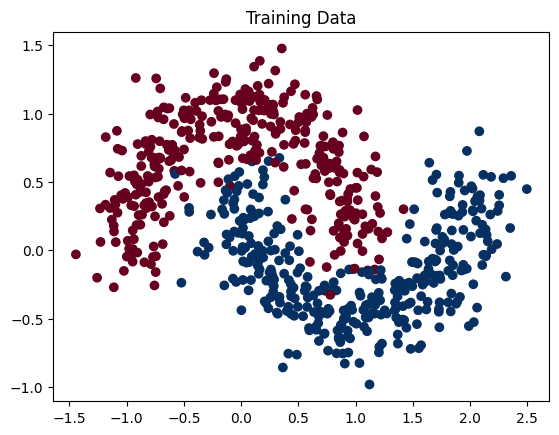

In [2]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu)
plt.title("Training Data")
plt.show()

## Model Building
Now, let's define a function to create a simple neural network model. You will modify this function later to experiment with different activation and loss functions.

In [3]:
def build_model(activation_function="relu", loss_function="binary_crossentropy"):
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(10, activation=activation_function, input_shape=(2,)),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(optimizer="adam", loss=loss_function, metrics=["accuracy"])
    return model

# Training and evaluating the model
Let's train the model and see how well it solves the problem.

10/10 [==============================] - 0s 2ms/step


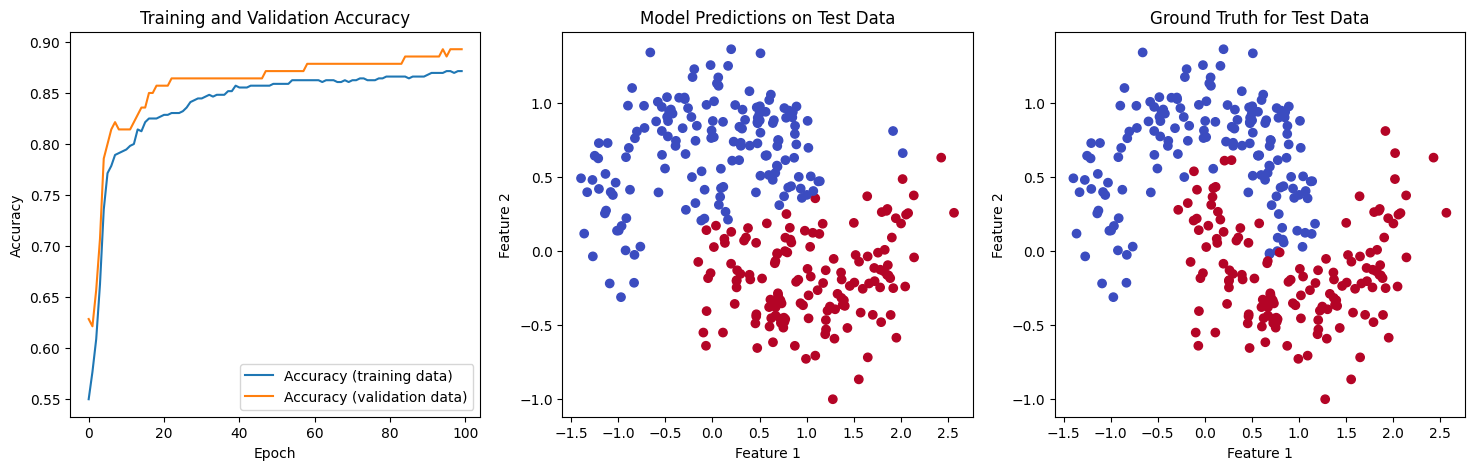

Test Loss: 0.2424
Test Accuracy: 0.9000


(0.2424089014530182, 0.8999999761581421)

In [14]:
# Function to train, evaluate, and visualize model predictions along with ground truth
def train_and_evaluate_model(model, epochs=100):
    history = model.fit(
        X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2
    )

    # Evaluating the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Plotting training history
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history["accuracy"], label="Accuracy (training data)")
    plt.plot(history.history["val_accuracy"], label="Accuracy (validation data)")
    plt.title("Training and Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend()

    # Predicting on test data
    predictions = model.predict(X_test) > 0.5

    # Plotting model predictions
    plt.subplot(1, 3, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0], cmap=plt.cm.coolwarm)
    plt.title("Model Predictions on Test Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # Plotting ground truth
    plt.subplot(1, 3, 3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.title("Ground Truth for Test Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.show()

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return test_loss, test_accuracy


# Example of using the function with a specific activation and loss function
model = build_model(activation_function="relu", loss_function="binary_crossentropy")
train_and_evaluate_model(model, epochs=100)

# Experimentation
## Task 1: Activation Functions
1. Experiment with different activation functions in the hidden layer. Replace activation_function in build_model with 'sigmoid', 'relu', and 'tanh'.
2. Train the model for each activation function and evaluate its performance on the test set.
3. Record your observations.
## Task 2: Loss Functions
1. Now, experiment with different loss functions. For binary classification, try 'binary_crossentropy' and 'mean_squared_error'.
2. Train and evaluate the model for each loss function.
3. Record your observations.

# Analysis and Questions
After completing the tasks, answer the following questions:

1. How did different activation functions affect the model's performance?
2. How did different loss functions impact the learning process and accuracy?
3. Which combination of activation and loss function provided the best results for this task?

# Conclusion
Summarize your findings and discuss why certain combinations might work better than others for this specific problem.

10/10 [==============================] - 0s 2ms/step


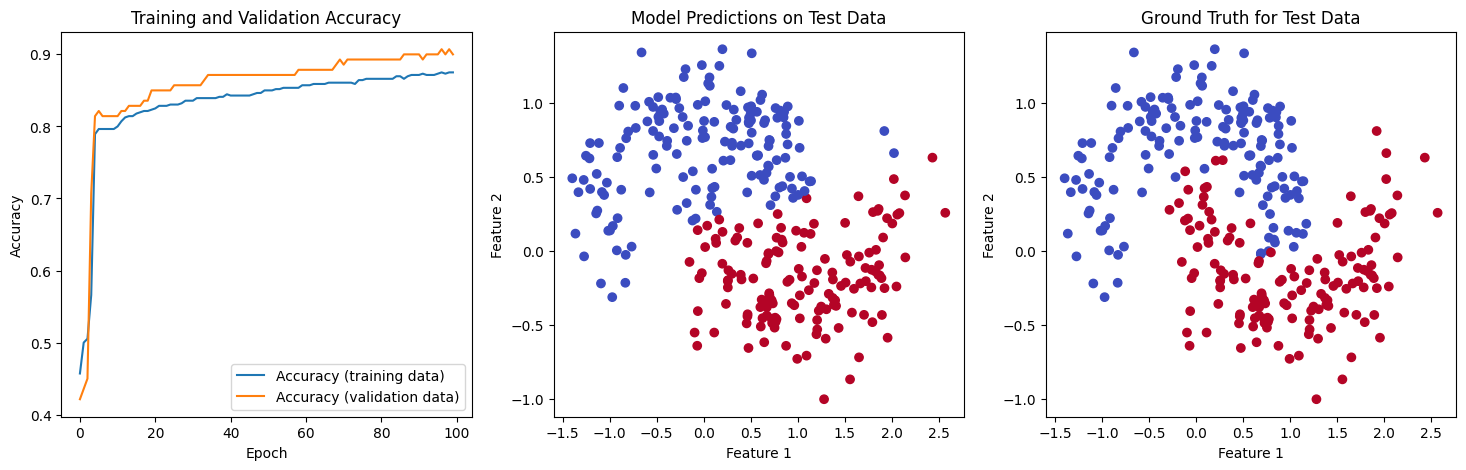

Test Loss: 0.2323
Test Accuracy: 0.9033
relu, binary_crossentropy: Test loss = 0.2323, Test accuracy = 0.9033
10/10 [==============================] - 0s 2ms/step


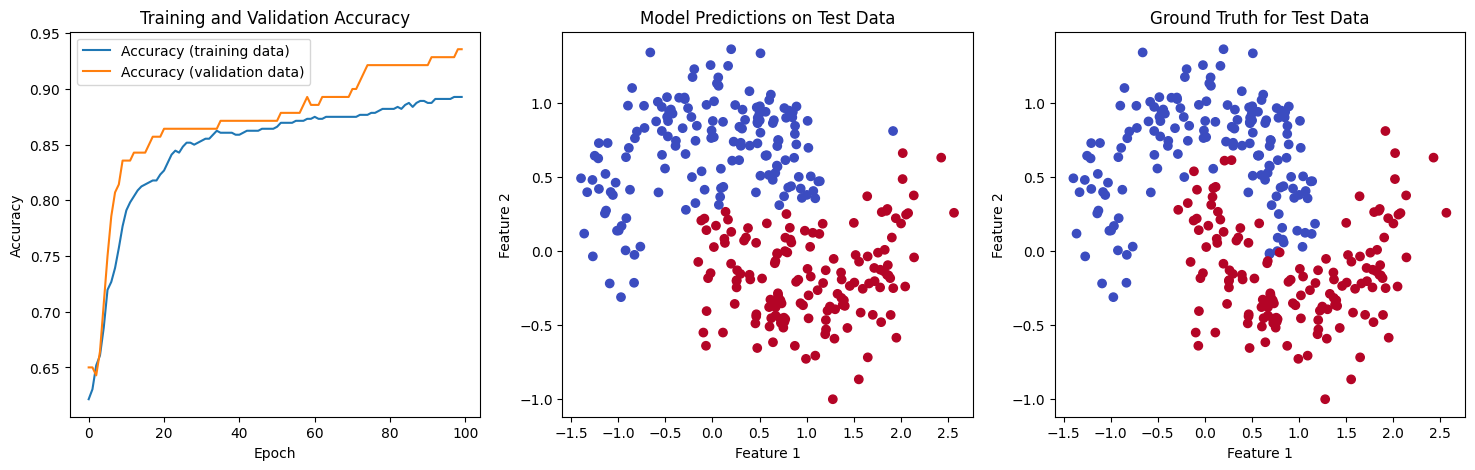

Test Loss: 0.0638
Test Accuracy: 0.9200
relu, mean_squared_error: Test loss = 0.0638, Test accuracy = 0.9200
10/10 [==============================] - 0s 2ms/step


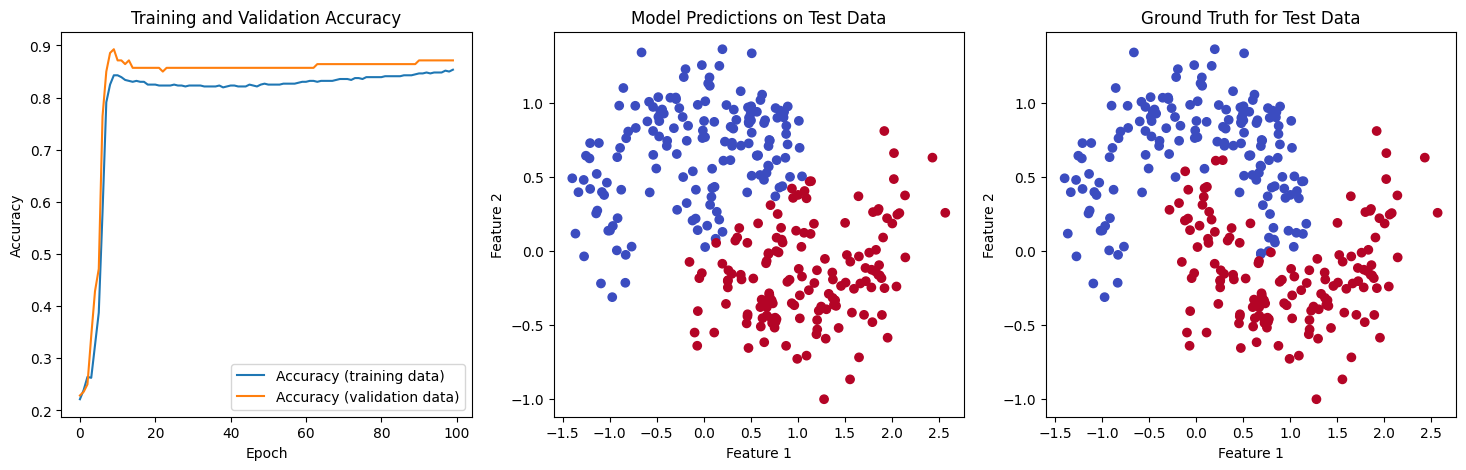

Test Loss: 0.2983
Test Accuracy: 0.8667
sigmoid, binary_crossentropy: Test loss = 0.2983, Test accuracy = 0.8667
10/10 [==============================] - 0s 2ms/step


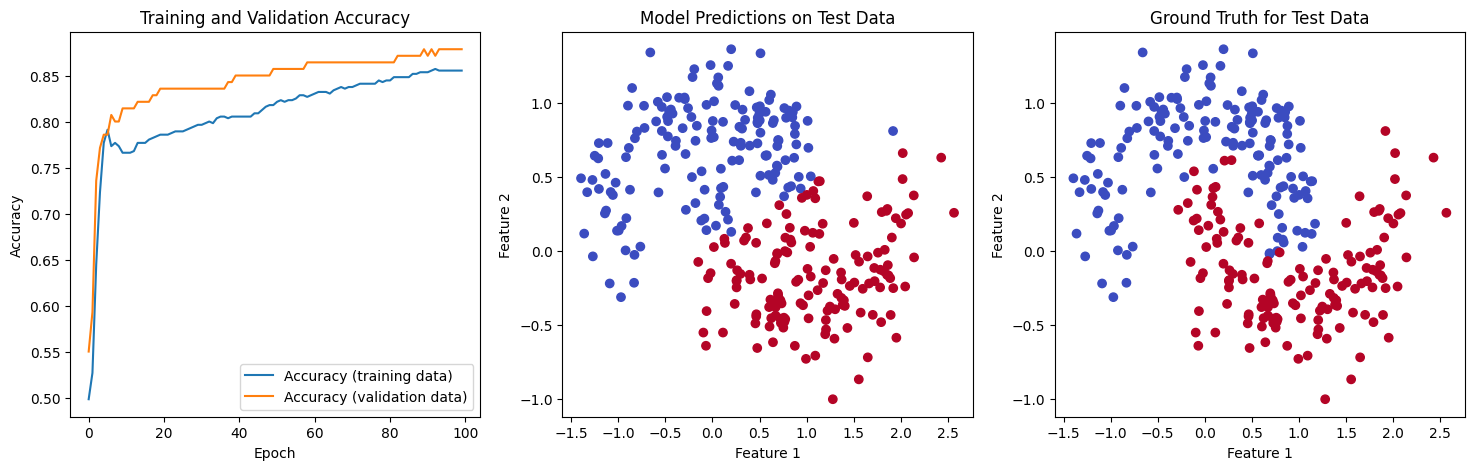

Test Loss: 0.0918
Test Accuracy: 0.8733
sigmoid, mean_squared_error: Test loss = 0.0918, Test accuracy = 0.8733
10/10 [==============================] - 0s 2ms/step


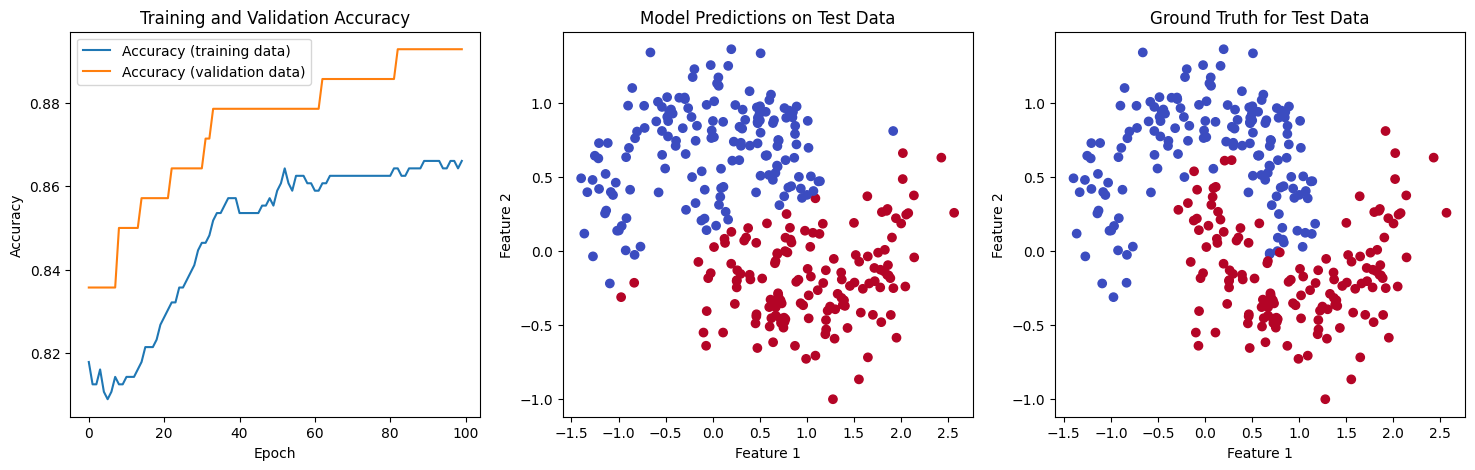

Test Loss: 0.2542
Test Accuracy: 0.8900
tanh, binary_crossentropy: Test loss = 0.2542, Test accuracy = 0.8900
10/10 [==============================] - 0s 2ms/step


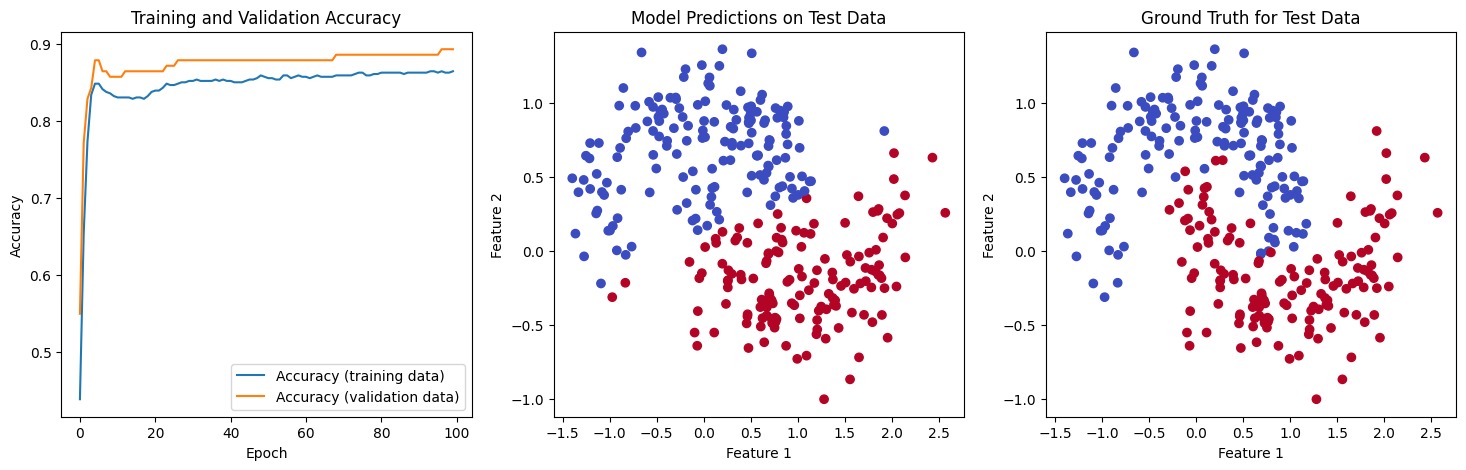

Test Loss: 0.0818
Test Accuracy: 0.8900
tanh, mean_squared_error: Test loss = 0.0818, Test accuracy = 0.8900

Summary Table:
  Activation function        Loss function  Test loss  Test accuracy
0                relu  binary_crossentropy   0.232336       0.903333
1                relu   mean_squared_error   0.063849       0.920000
2             sigmoid  binary_crossentropy   0.298326       0.866667
3             sigmoid   mean_squared_error   0.091773       0.873333
4                tanh  binary_crossentropy   0.254169       0.890000
5                tanh   mean_squared_error   0.081763       0.890000


In [16]:
# instead of manually changing activation and loss function, i'll use a for-loop to loop through the different functions.
# i also changed the build_model() function to return test_loss and test_accuracy
# we also record the results and save them in a df, makes it easier to go through the numbers, rather than looking at a graph

import pandas as pd

activation_functions = ["relu", "sigmoid", "tanh"]
loss_functions = ["binary_crossentropy", "mean_squared_error"]

results_list = []

for activation_function in activation_functions:
    for loss_function in loss_functions:
        model = build_model(
            activation_function=activation_function, loss_function=loss_function
        )
        test_loss, test_accuracy = train_and_evaluate_model(model, epochs=100)

        results_list.append(
            {
                "Activation function": activation_function,
                "Loss function": loss_function,
                "Test loss": test_loss,
                "Test accuracy": test_accuracy,
            }
        )

        print(
            f"{activation_function}, {loss_function}: Test loss = {test_loss:.4f}, Test accuracy = {test_accuracy:.4f}"
        )

results_df = pd.DataFrame(results_list)

print("\nSummary Table:")
print(results_df)

# Analysis and Questions
After completing the tasks, answer the following questions:

1. How did different activation functions affect the model's performance?
2. How did different loss functions impact the learning process and accuracy?
3. Which combination of activation and loss function provided the best results for this task?

# Conclusion
Summarize your findings and discuss why certain combinations might work better than others for this specific problem.

* 1. Det är inte speciellt stor skillnad mellan dem olika modellerna i själva resultatet. Skillnaden man ser är hur många epocher det tar för dem olika modellerna att nå "diminishing returns". Vissa går upp och lägger sig stabilt efter bara några få epocher, så som relu och sigmoid. Tanh tar en lite mer "hackig" väg fram till reslutatet, som den stegar genom en trappa. Det tar fler epocher för att den ska nå ungefär samma resultat som den andra modellerna, men kontentan blir tillslut detsamma ändå. Accuracy och loss är väldigt lika bland relu, sigmoid och tanh, åtminstone när man kör med binary_crossentropy som loss function. Den största skillnaden på resultatet ser man när man istället kör med mean_squared_error som loss function.

        Det är spännande att se hur sigmoid-modellen peakar väldigt tidigt, för att sedan gå ner lite, och till slut upp igen för att lägga sig stabilt.

* 2. med mean_squared_error som loss function på relu så ser vi att det tar betydligt fler epocher för relu-modellen att nå "diminishing returns", men resultatet blir bättre. med binary_crossentropy så når den sitt maximum redan efter ~30 epocher, medan den fortfarande ser ut att stiga efter 100 epocher med mean_squared_error. För tanh och sigmoid så ser modellerna ganska lika ut varandra, oavsett loss function. det som skiljer dem är att "test loss" är mycket lägre när man kör mean_squared_error.
    

* 3. Bästa resultatet ser vi med relu-modellen med mean_squared_error loss function. Man ser en generell förbättring av mean_squared_error som loss function på alla modeller faktiskt, men relu-modellen presterade bäst.

Other notes:

Accuracy: While accuracy gives a high-level view of your model's performance, it may not be suitable for all situations. For example, in imbalanced datasets where one class is much more frequent than the other, a model that predicts the majority class all the time could still achieve a high accuracy, but it might not be useful.

Test Loss: It provides a more continuous and granular measure of how well your model is doing. It directly reflects how far off your predictions are from the actual values. During training, the model aims to minimize this loss, leading to better generalization on unseen data.

Något som är lite konstigt är att träningsdatan aldrig hamnar över valideringsdatan. Detta har nog att göra med att det är såpass få datapunkter i detta settet. Det kan även bero på att vi kör väldigt få epocher för att testa/träna/validera etc. Ifall vi ökar antalet datapunkter samt epocher så kommer vi se att träningsdatan blir bättre än valideringsdatan, något som vi egentligen är ute efter.

In [35]:
results_df.sort_values("Test loss", ascending=True)

,Activation function,Loss function,Test loss,Test accuracy
1,relu,mean_squared_error,0.063849,0.920000
5,tanh,mean_squared_error,0.081763,0.890000
3,sigmoid,mean_squared_error,0.091773,0.873333
0,relu,binary_crossentropy,0.232336,0.903333
4,tanh,binary_crossentropy,0.254169,0.890000
2,sigmoid,binary_crossentropy,0.298326,0.866667


In [32]:
results_df

,Activation function,Loss function,Test loss,Test accuracy
0,relu,binary_crossentropy,0.232336,0.903333
1,relu,mean_squared_error,0.063849,0.920000
2,sigmoid,binary_crossentropy,0.298326,0.866667
3,sigmoid,mean_squared_error,0.091773,0.873333
4,tanh,binary_crossentropy,0.254169,0.890000
5,tanh,mean_squared_error,0.081763,0.890000
